In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()
pd.options.mode.chained_assignment = None

In [53]:
def get_graphs_i_need(file_name: str):
    df = pd.read_csv(file_name)

    # get pearson correlation coefficient

    df_deers = df[df['species'] == "Deer"]
    df_grass = df[df['species'] == "Grass"]

    print(f"R = {np.corrcoef(df_deers['population'], df_grass['population'])[0][1]}")

    data_count = max(df[df["species"] == "Deer"]["time"])
    
    # plotting deer/grass population
    plt.figure(figsize=(20, 7))
    plt.title("Populations against Time")

    g = sns.lineplot(data=df[(df['species'] == "Deer") | (df['species'] == "Grass")], x="time", y="population", hue="species", palette=["b", "g"], linewidth=2) # plot the populations against time

    average_deer_population = np.average(df[(df['species'] == "Deer")]["population"])
    print(f"Average deer population: {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], "b--", linewidth=1, label="Average Deer Population")

    average_grass_population = np.average(df[(df['species'] == "Grass")]["population"])
    print(f"Average grass population: {average_grass_population}")
    plt.plot([0, data_count], [average_grass_population, average_grass_population], "g--", linewidth=1, label="Average Grass Population")

    plt.legend()

    g.set(xlabel="Time", ylabel="Population")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    # traits of deer over time
    plt.figure(figsize=(20, 7))
    plt.title("Speed/Size against Time")
    g = sns.lineplot(data=df_deers, x="time", y="speed", linewidth=2, label="Speed")
    g = sns.lineplot(data=df_deers, x="time", y="size", linewidth=2, label="Size")
    g.set(xlabel="Time", ylabel="Speed/Size")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    average_deer_speed = np.average(df_deers["speed"])
    average_deer_size = np.average(df_deers["size"])

    print(f"Average deer speed: {average_deer_speed}")
    print(f"Average deer size: {average_deer_size}")

    # Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations. For instance, if your company sells ice, you might notice a fluctuation upwards on hot days
    # https://www.indeed.com/career-advice/career-development/what-is-rolling-average#:~:text=Rolling%20averages%20are%20useful%20for,might%20become%20difficult%20to%20track.

    window_size = 100

    df_deers["birthsSmoothed"] = df_deers["births"].rolling(window_size).mean()
    df_deers["deathsTotalSmoothed"] = df_deers["deathsTotal"].rolling(window_size).mean()
    df_deers["deathsByAgeSmoothed"] = df_deers["deathsByAge"].rolling(window_size).mean()
    df_deers["deathsByThirstSmoothed"] = df_deers["deathsByThirst"].rolling(window_size).mean()
    df_deers["deathsByHungerSmoothed"] = df_deers["deathsByHunger"].rolling(window_size).mean()

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    g = sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths", linewidth=2)
    g.set(xlabel="Time", ylabel="Births/Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Births/Deaths by cause against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths Total", linewidth=2)
    sns.lineplot(data=df_deers, x="time", y="deathsByAgeSmoothed", label="Deaths by age", linewidth=2)
    sns.lineplot(data=df_deers, x="time", y="deathsByThirstSmoothed", label="Deaths by thirst", linewidth=2)
    g = sns.lineplot(data=df_deers, x="time", y="deathsByHungerSmoothed", label="Deaths by hunger", linewidth=2)

    g.set(xlabel="Time", ylabel="Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Overall population growth against Time")
    df_deers["netPopulationChange"] = df_deers["births"] - df_deers["deathsTotal"]
    df_deers["netPopulationChangeSmoothed"] = df_deers["netPopulationChange"].rolling(window_size).mean()

    g = sns.lineplot(data=df_deers, x="time", y="netPopulationChangeSmoothed", linewidth=2)
    plt.axhline(y=0, xmin=0, xmax=data_count, color="b", linestyle="--", linewidth=1)
    g.set(xlabel="Time", ylabel="Net Population Change")
    g.axes.set_xlim(0)

R = -0.19960154760646653
Average deer population: 191.9700272479564
Average grass population: 32.69959128065395
Average deer speed: 1.1191704029291554
Average deer size: 1.4807823985013626


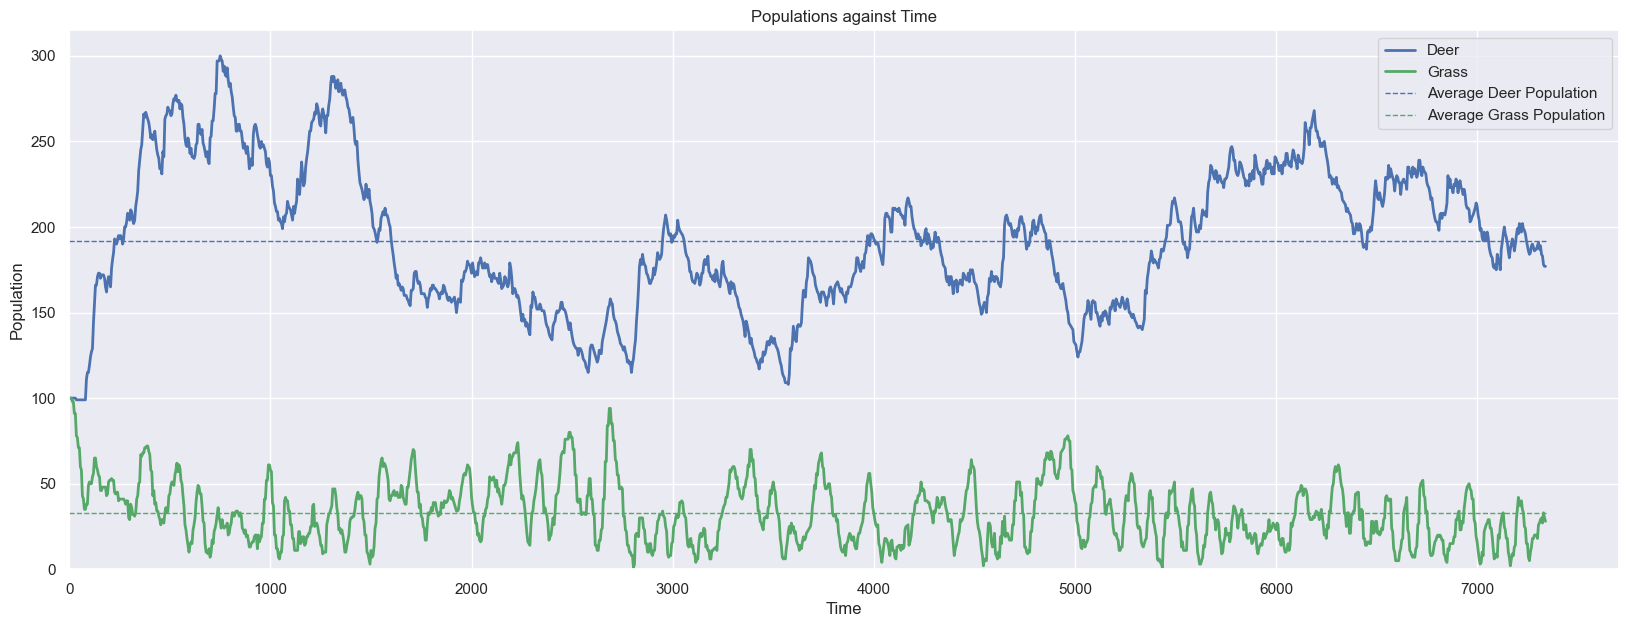

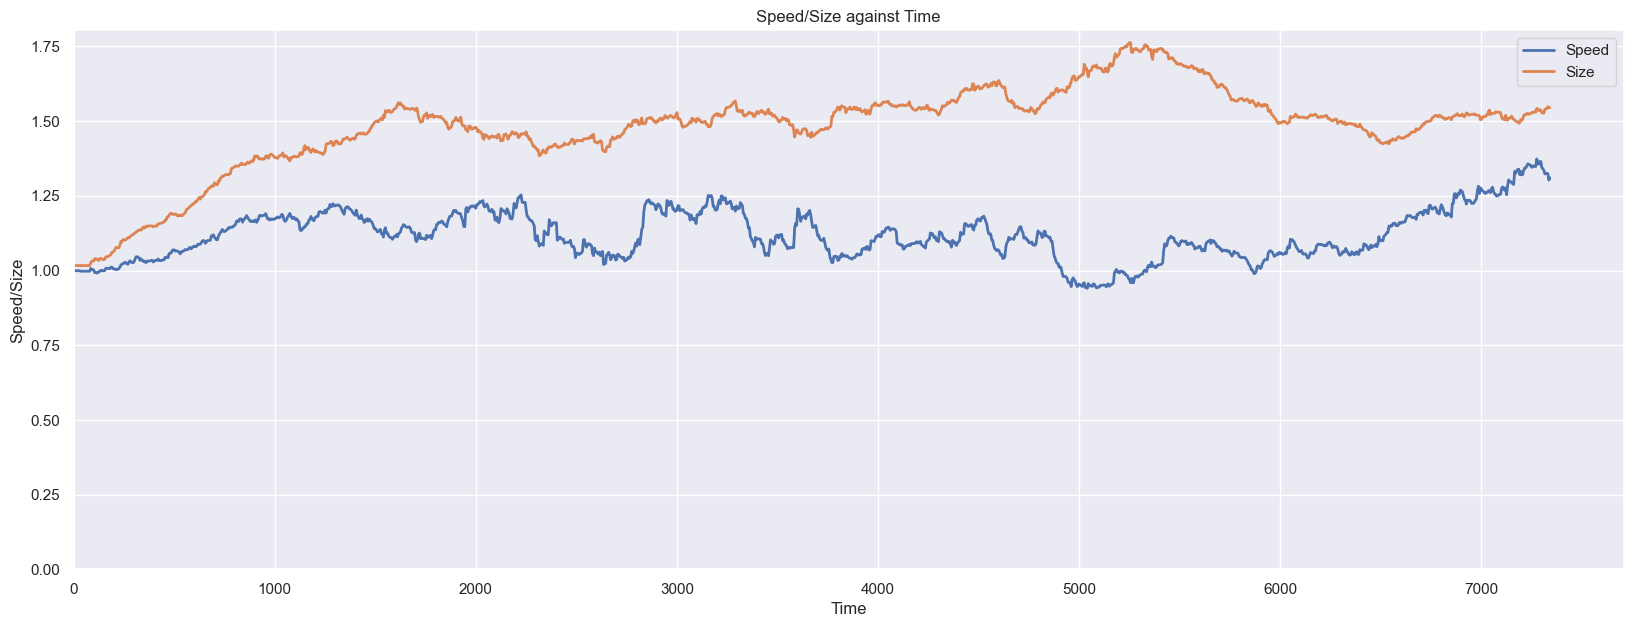

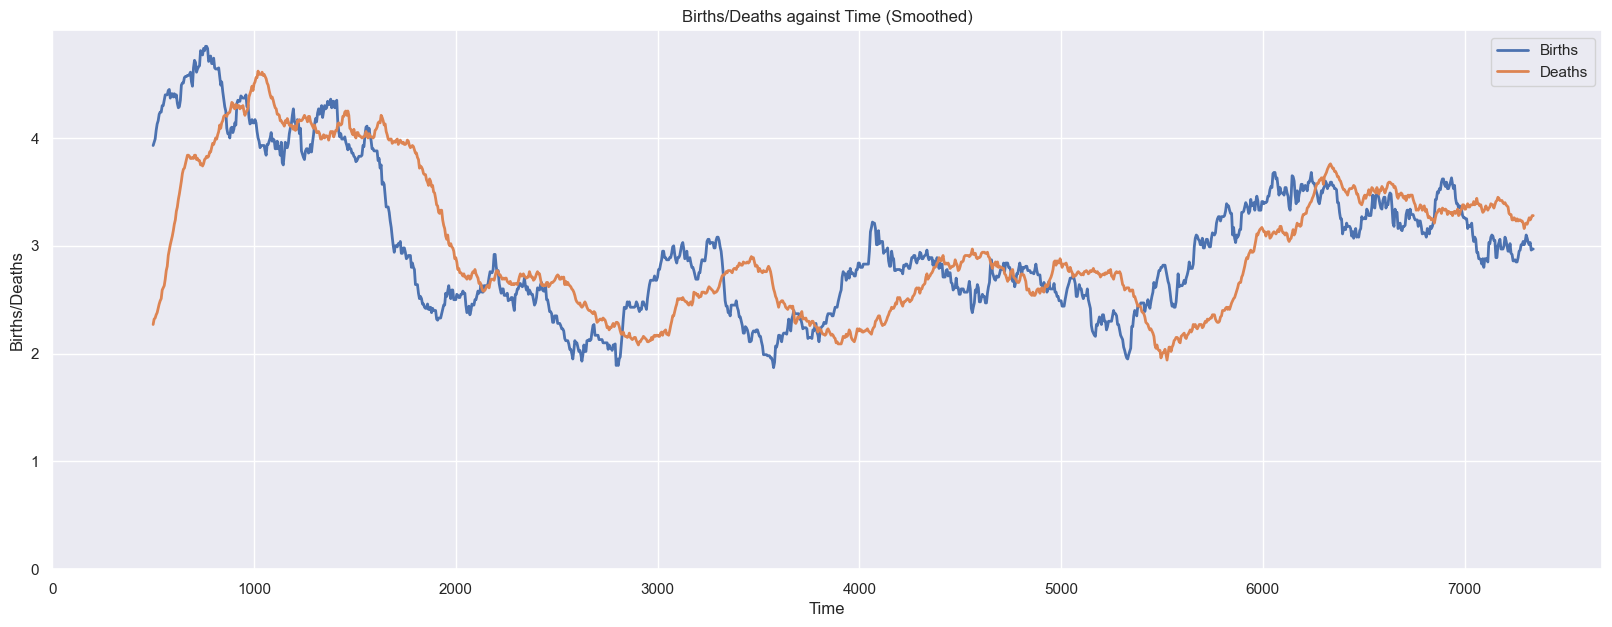

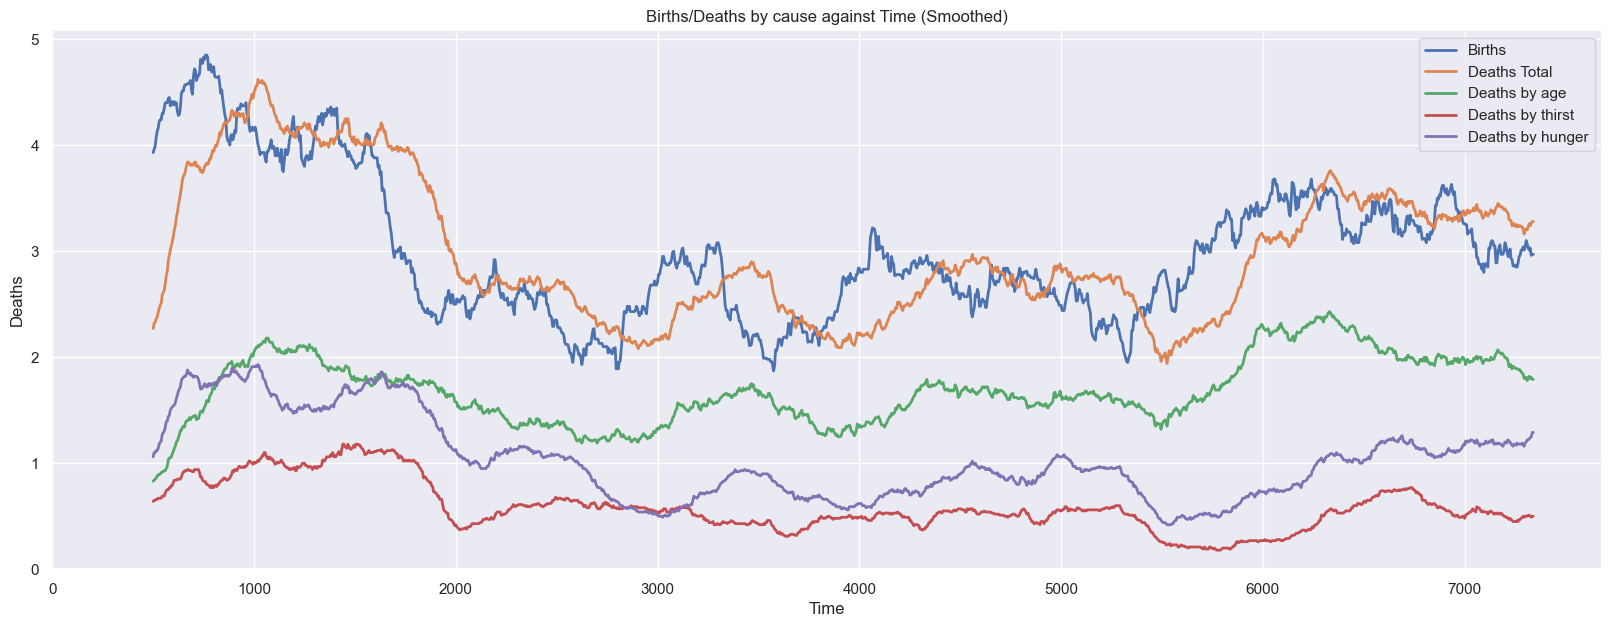

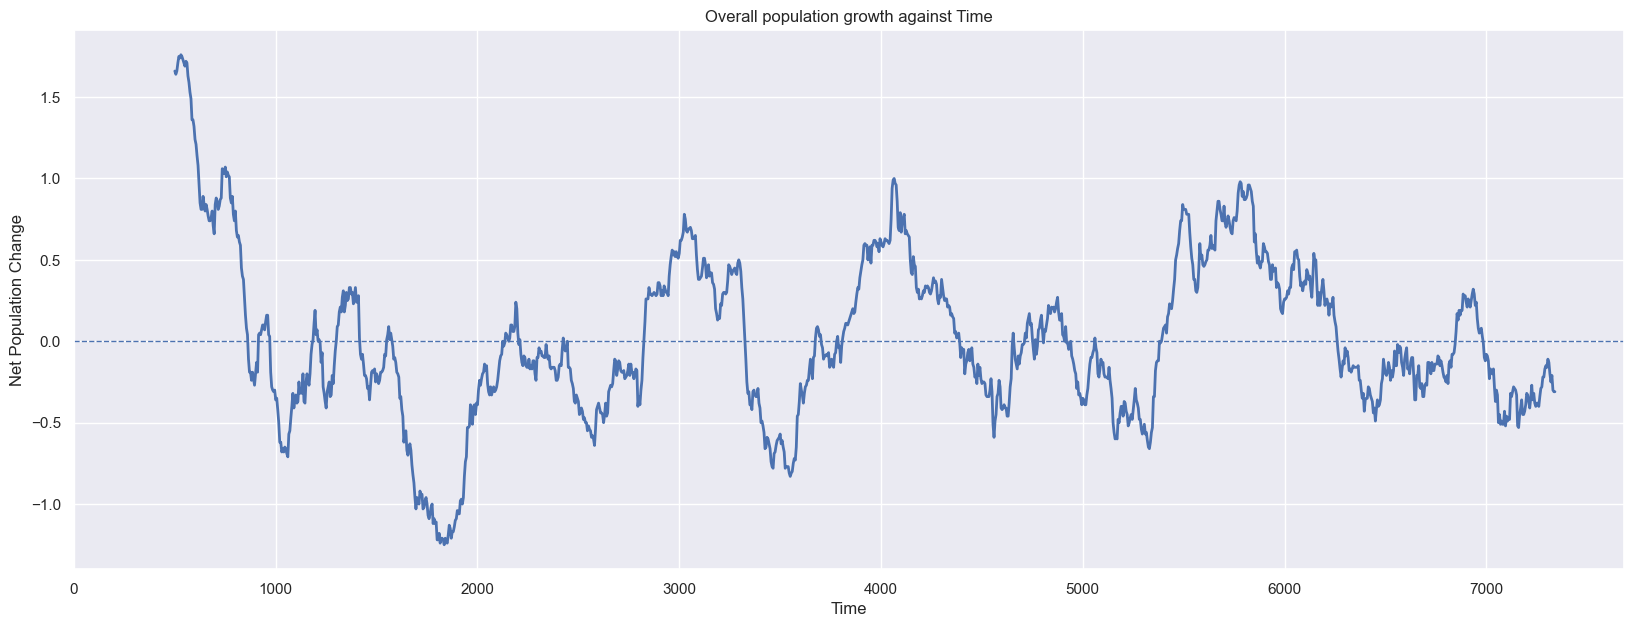

In [89]:
get_graphs_i_need("data/deer-100-plant-100.csv")

R = -0.25537420080957296
Average deer population: 208.7293868921776
Average grass population: 109.42635658914729
Average deer speed: 1.2675109002818885
Average deer size: 1.5036220005637773


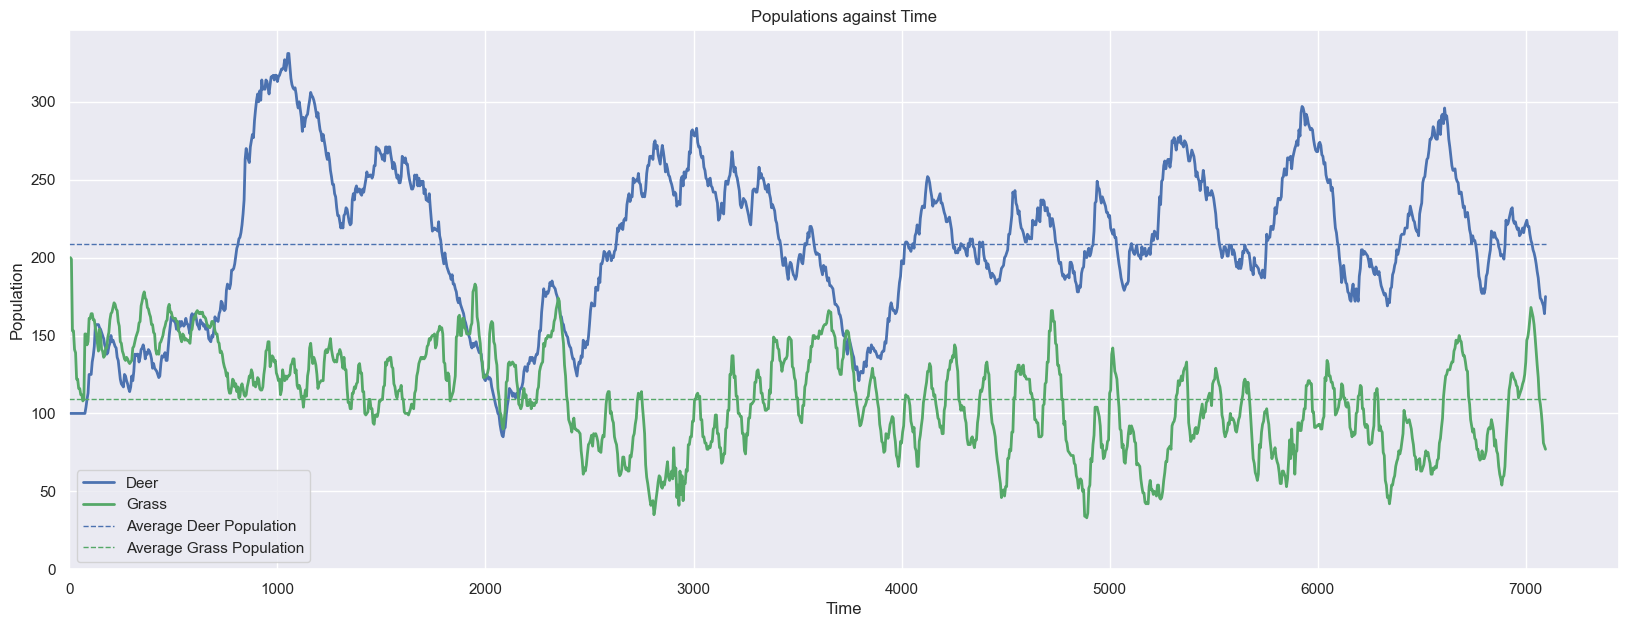

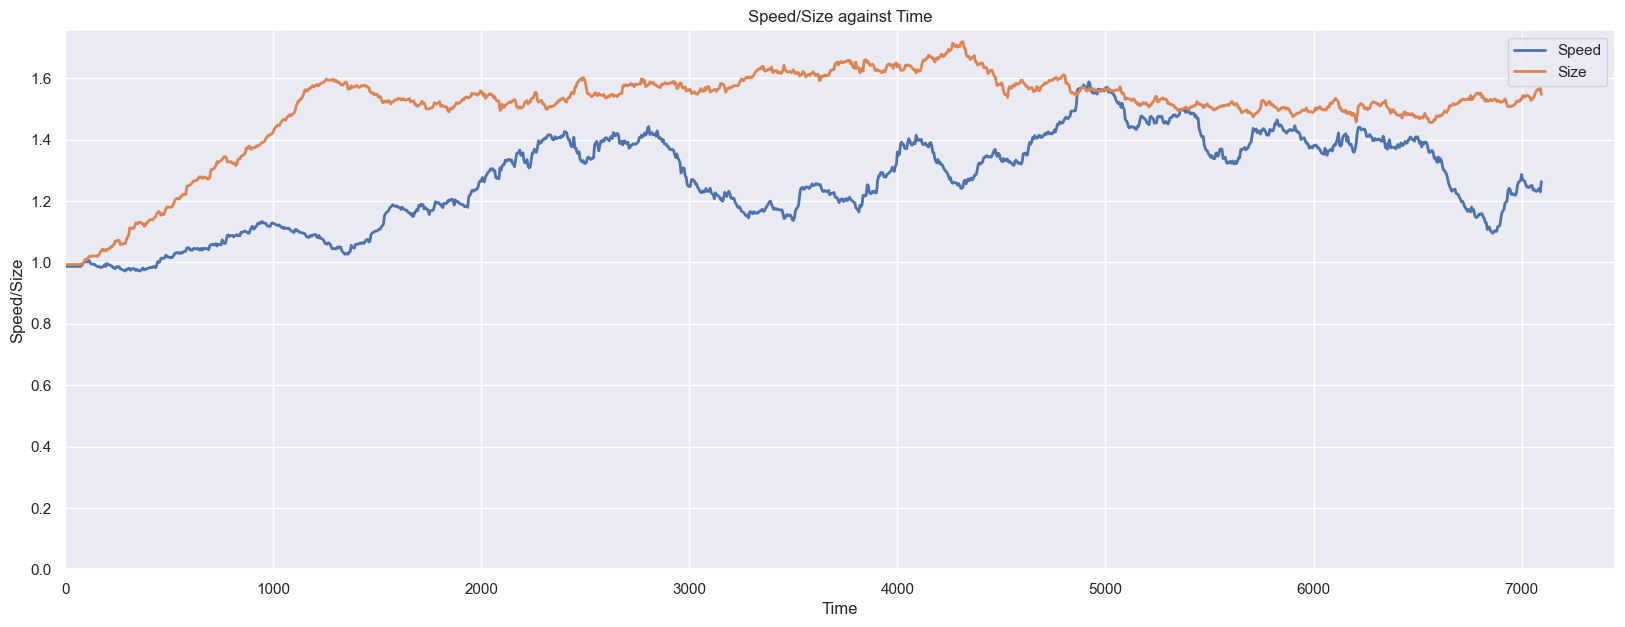

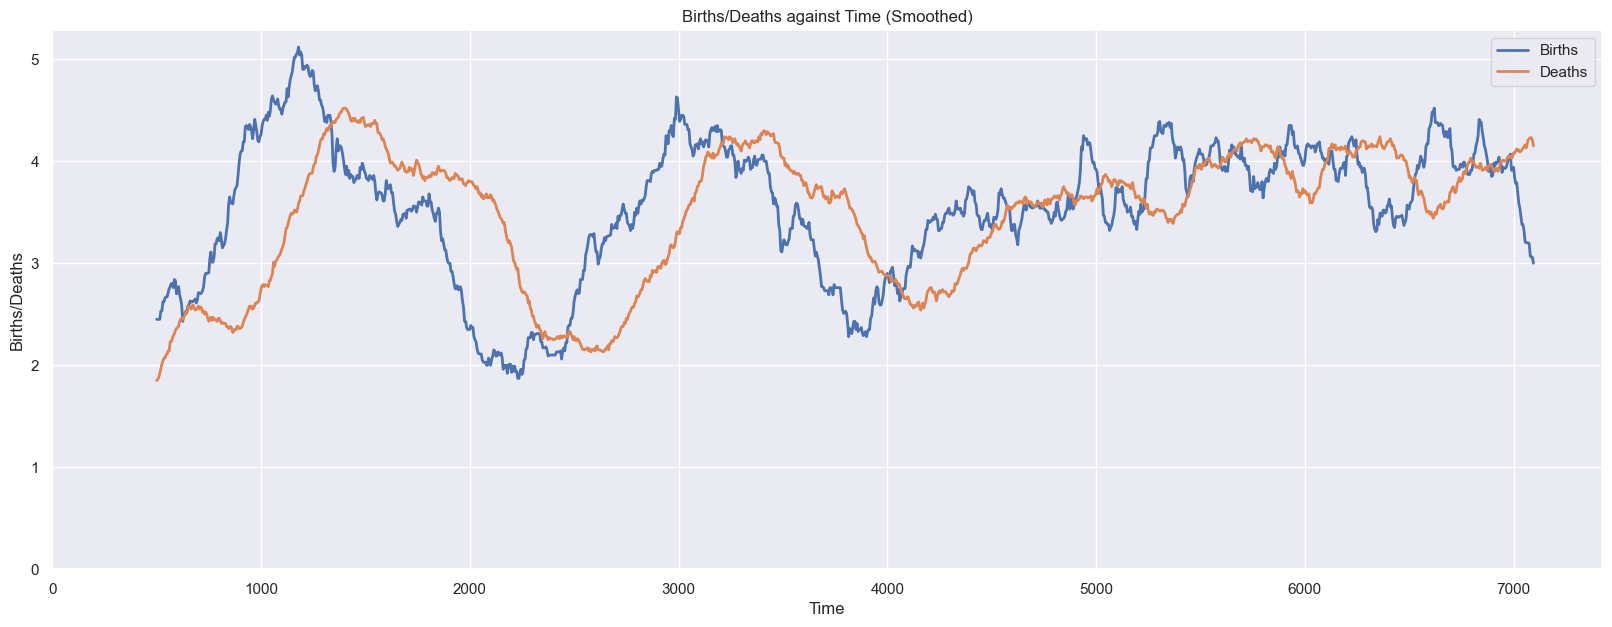

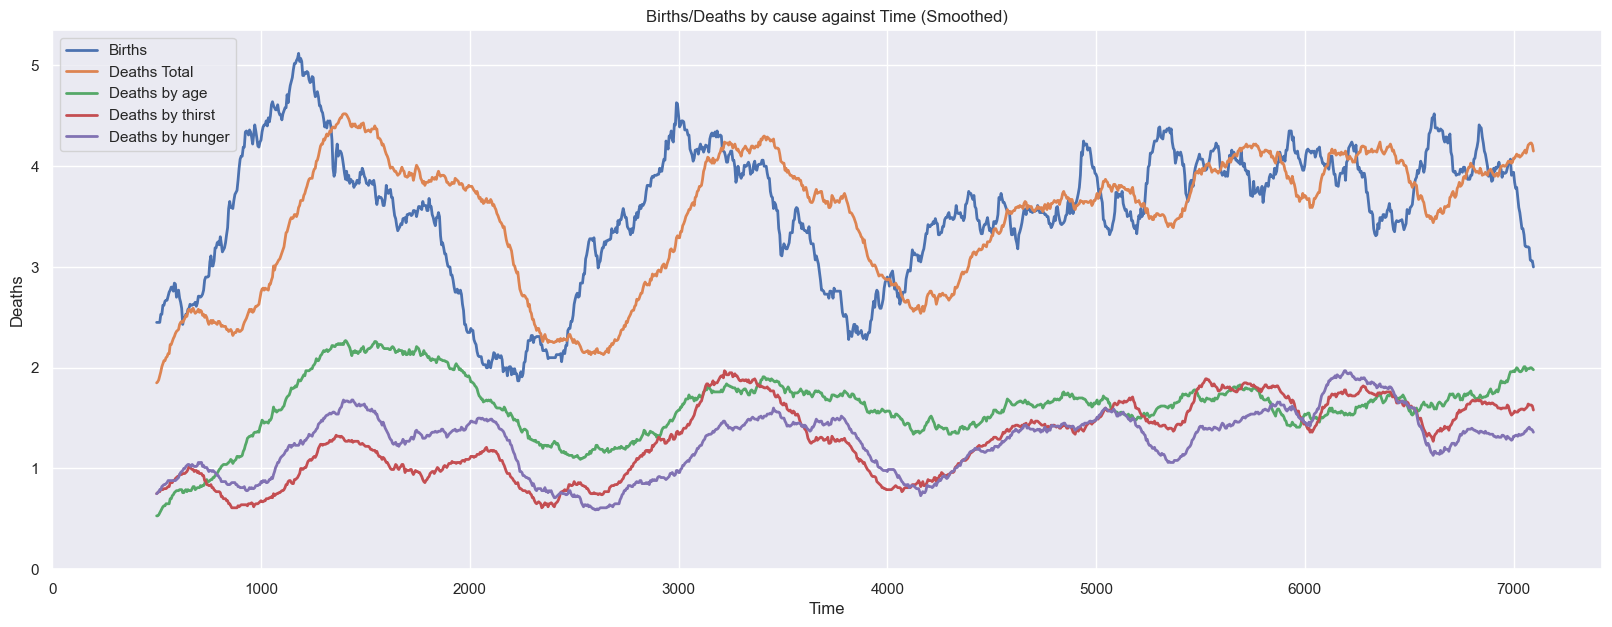

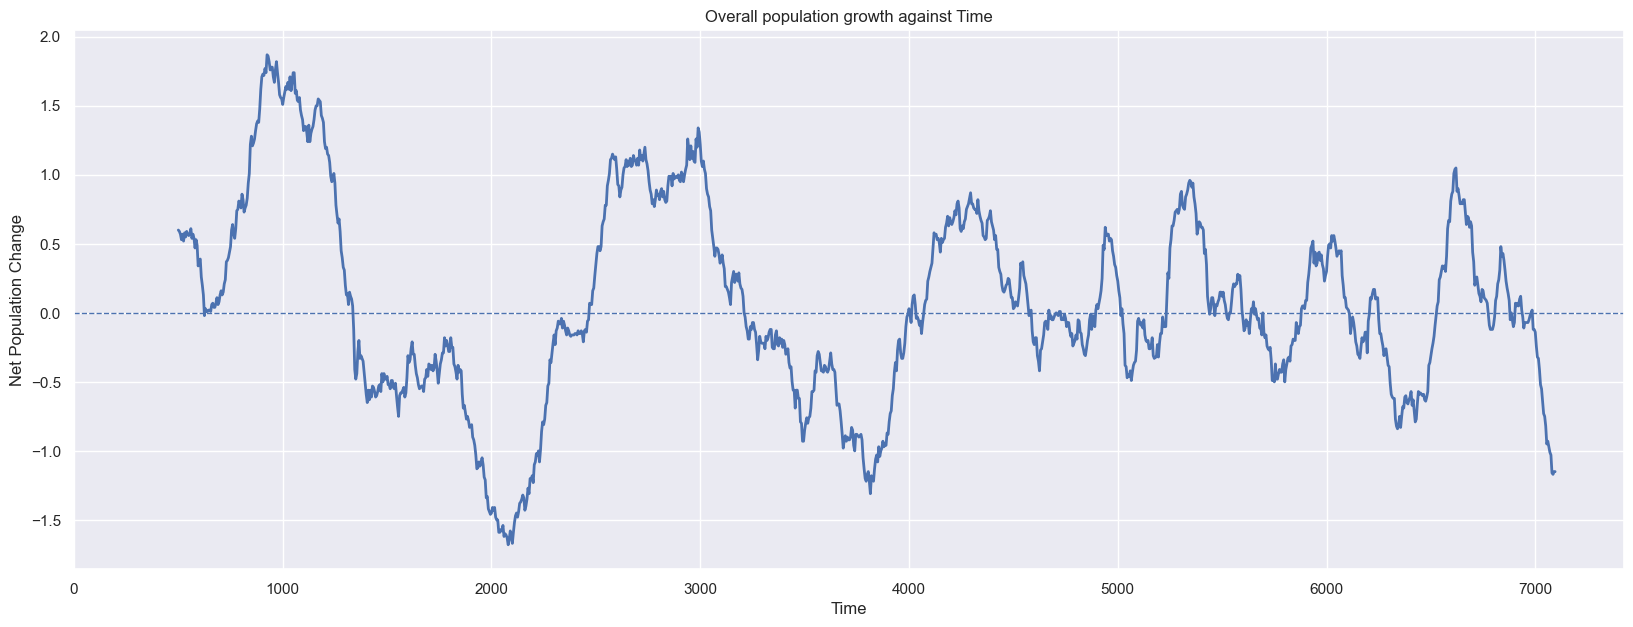

In [90]:
get_graphs_i_need("data/deer-100-plant-200.csv")

R = -0.07982756140478647
Average deer population: 224.34966592427617
Average grass population: 212.83964365256125
Average deer speed: 1.100088817817372
Average deer size: 1.5135537787676319


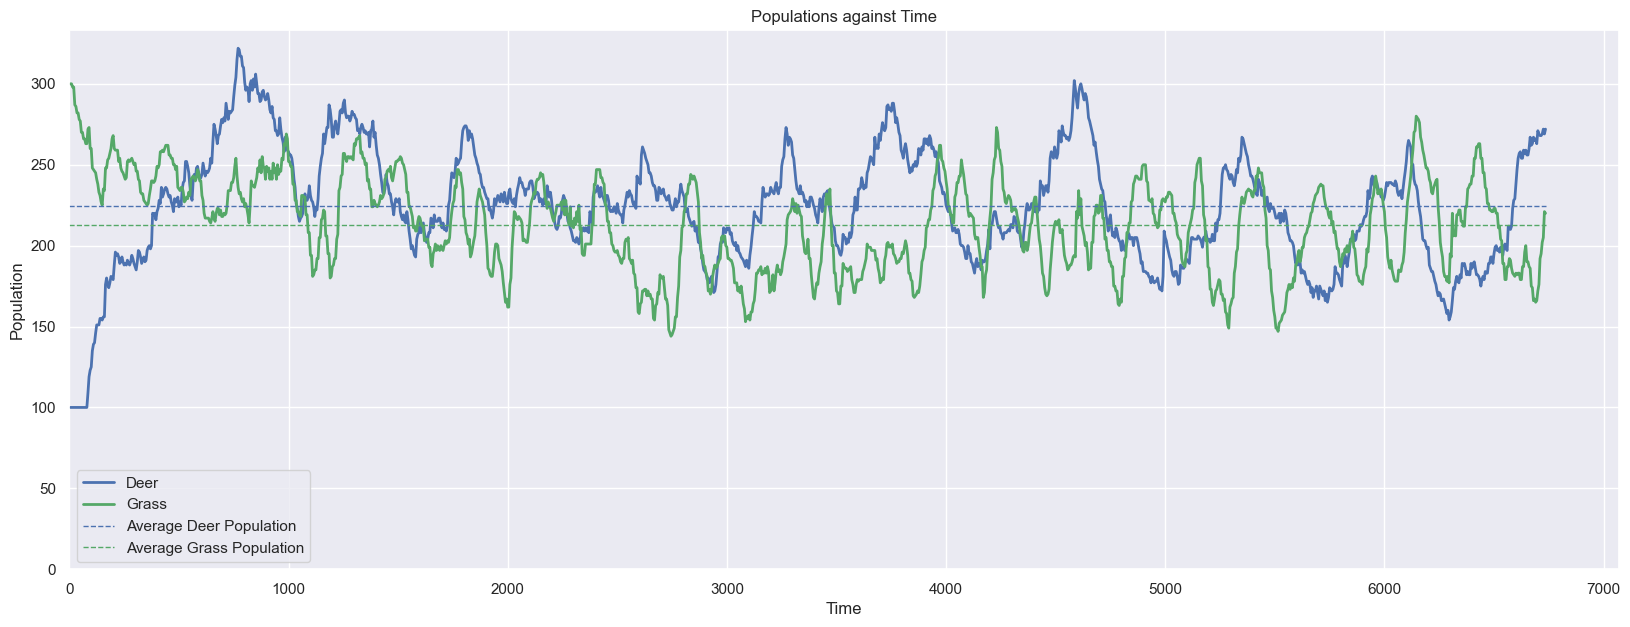

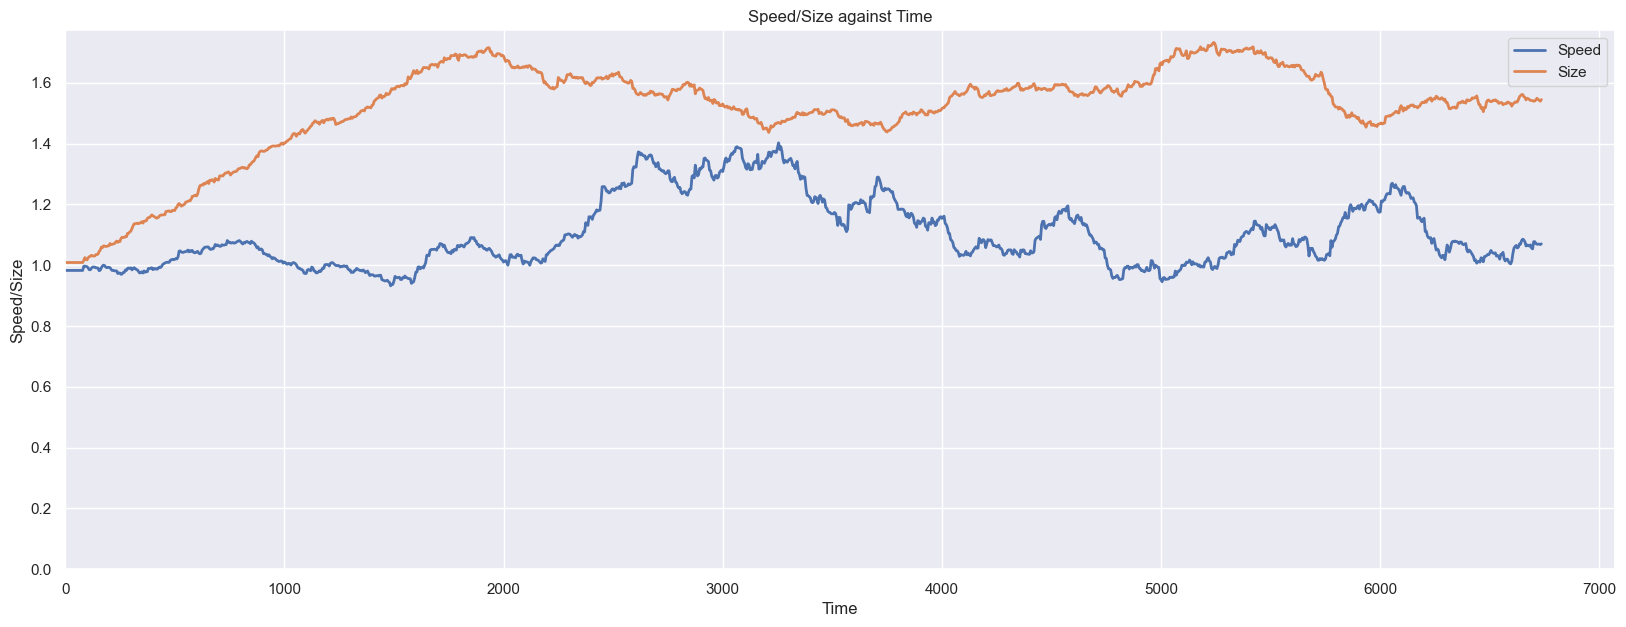

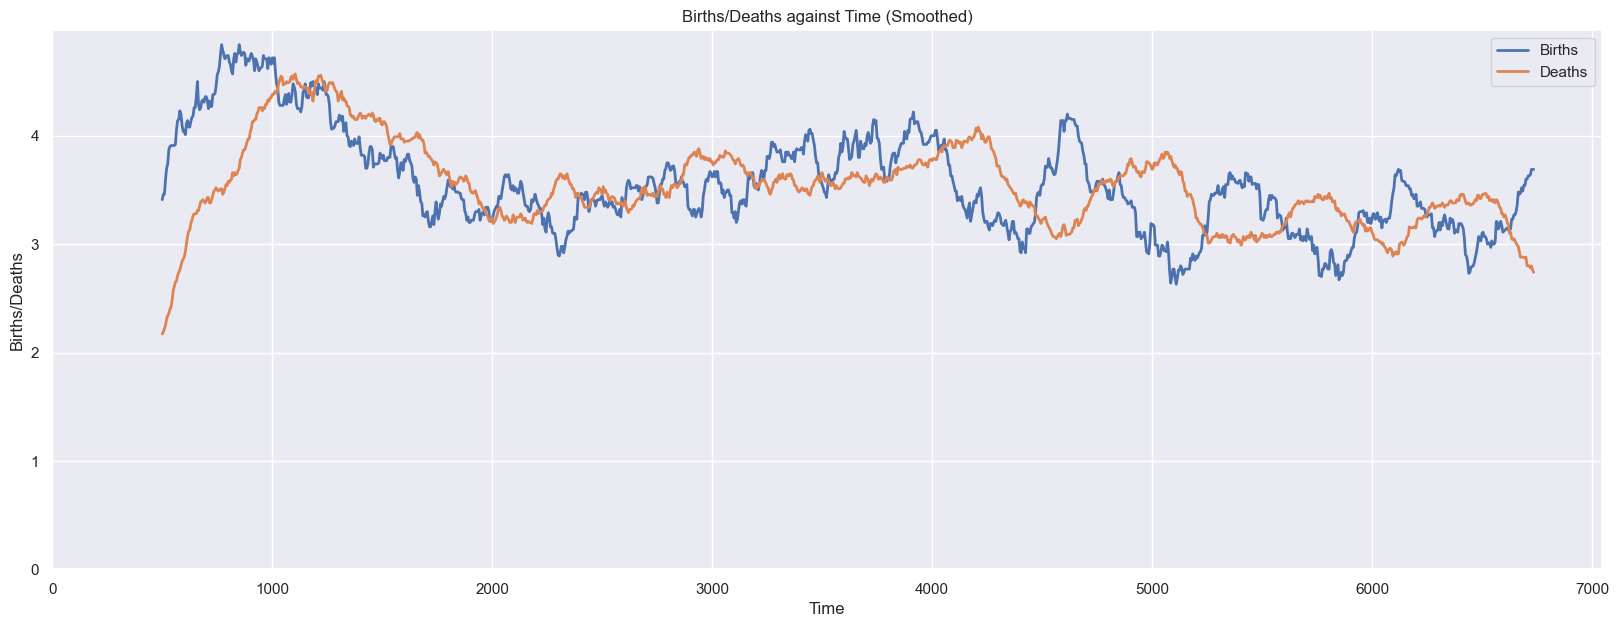

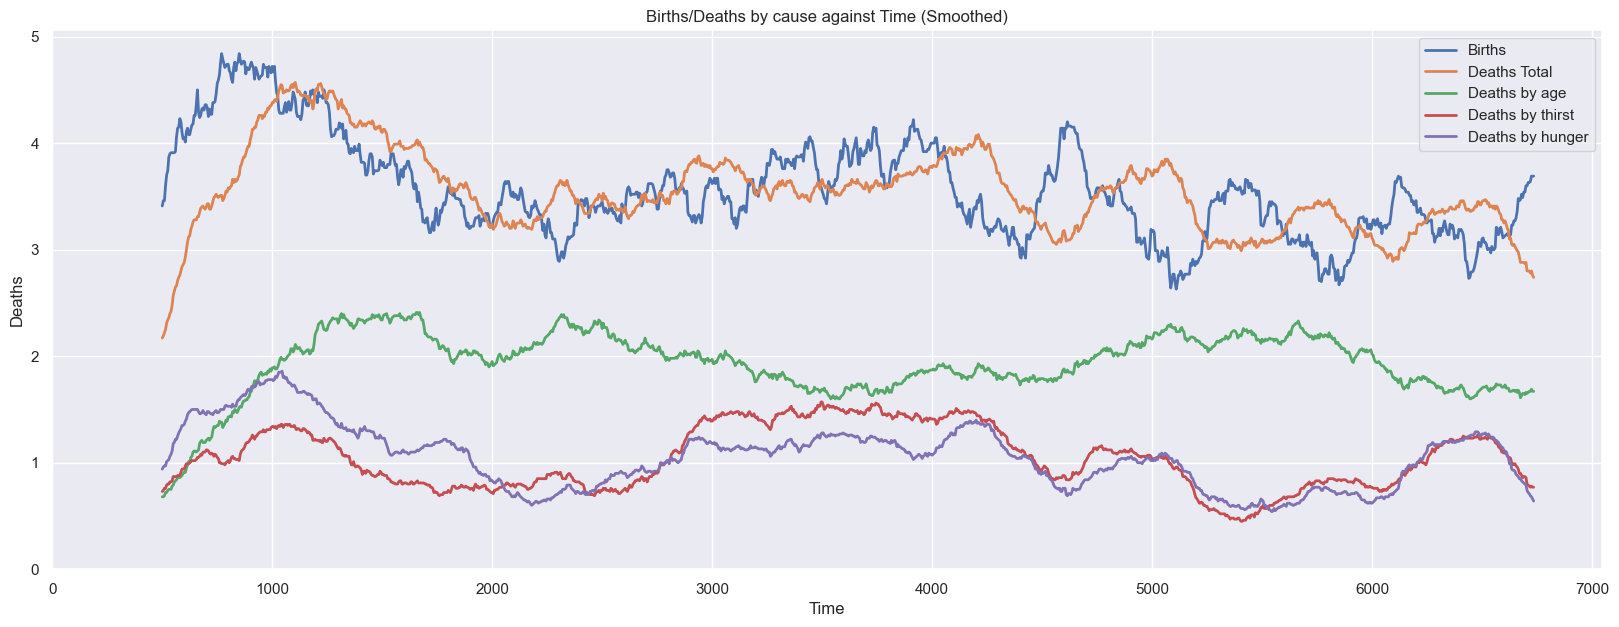

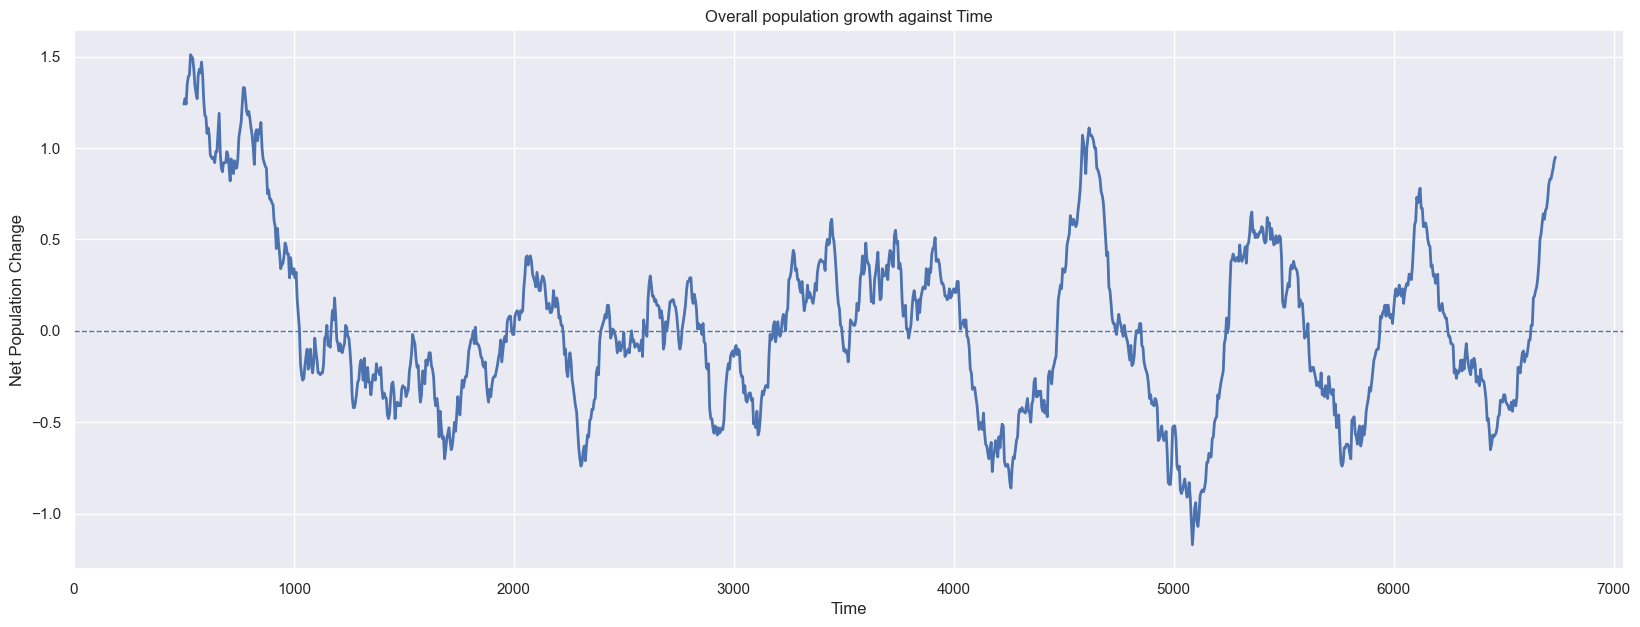

In [91]:
get_graphs_i_need("data/deer-100-plant-300.csv")

R = -0.03893525550824875
Average deer population: 235.87806691449813
Average grass population: 320.58364312267656
Average deer speed: 0.9892560876579926
Average deer size: 1.5761196691449815


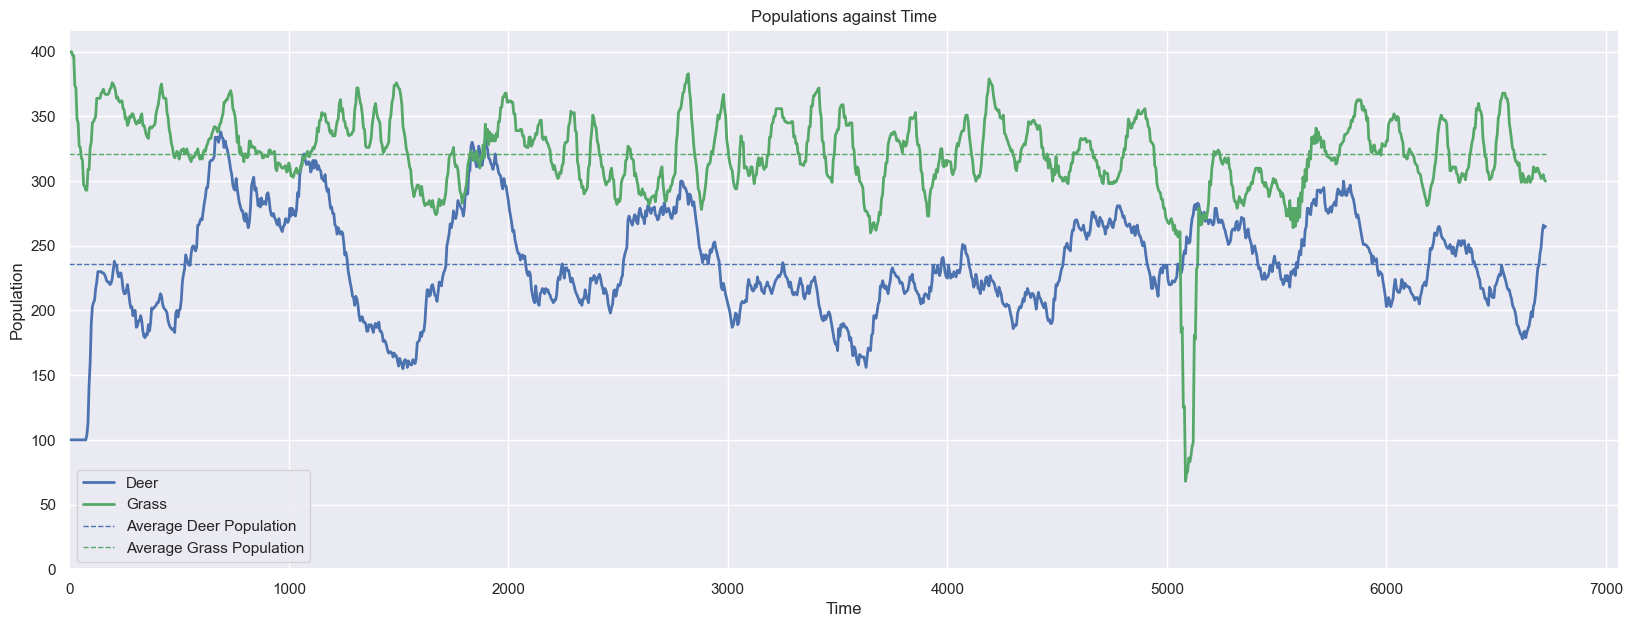

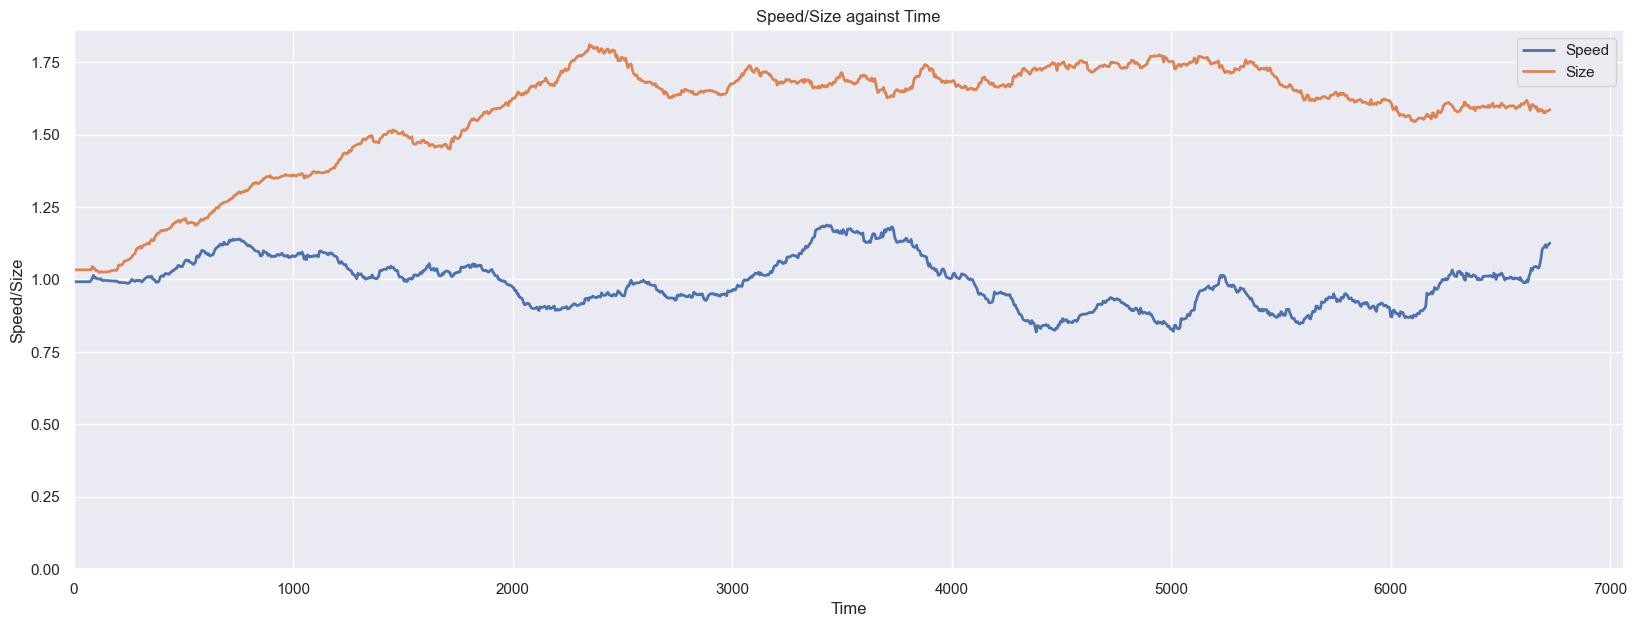

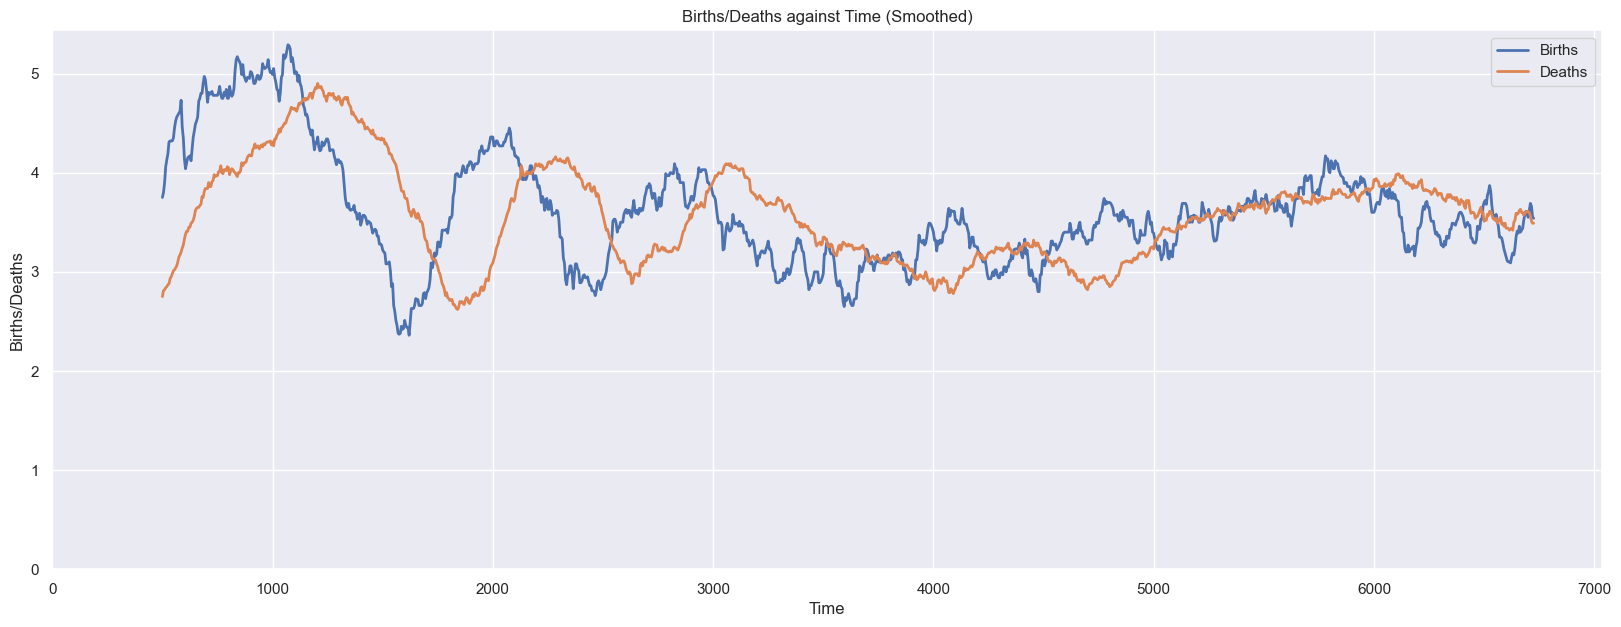

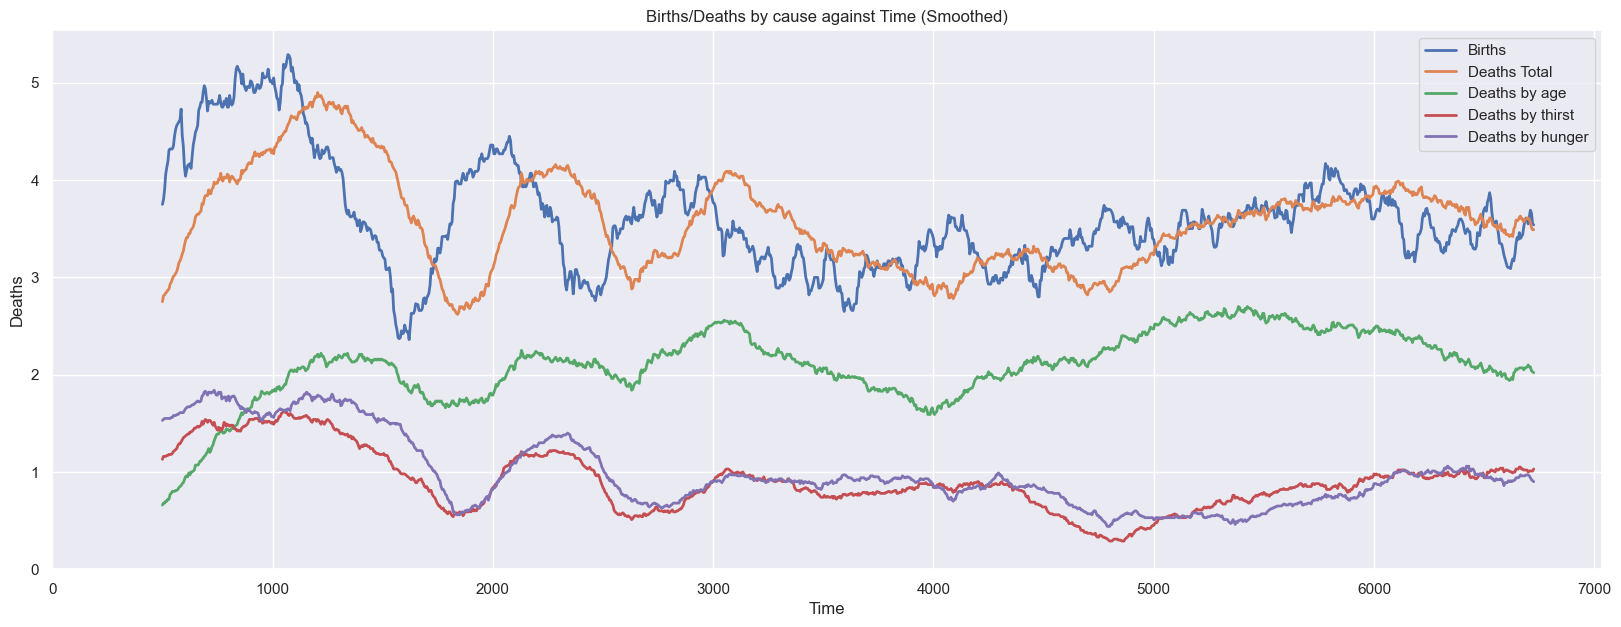

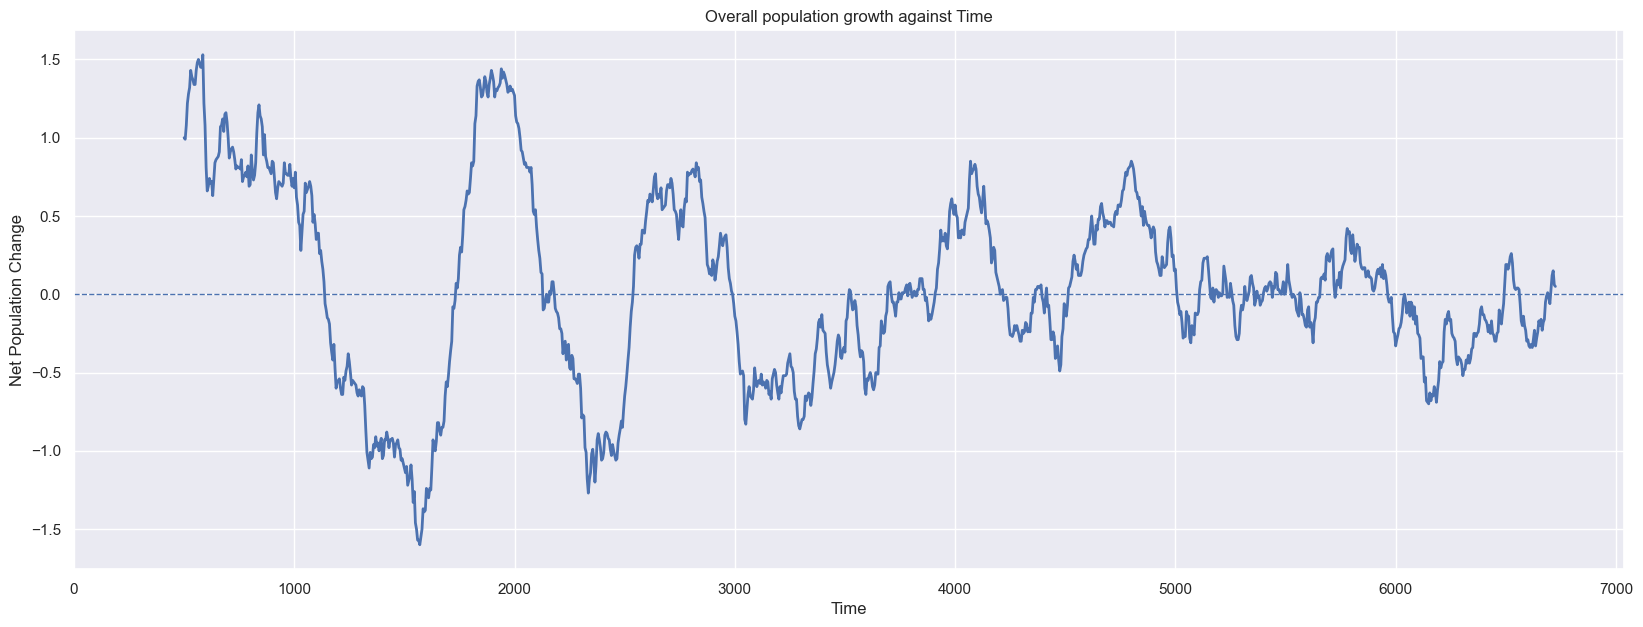

In [92]:
get_graphs_i_need("data/deer-100-plant-400.csv")

In [116]:
window_size = 25

df_100 = pd.read_csv("data/deer-100-plant-100.csv")
df_100 = df_100[df_100["time"] <= 6000]
df_100["plant_starting_population"] = 100
df_100["deathsByHungerSmoothed"] = df_100["deathsByHunger"].rolling(window_size).mean()

df_200 = pd.read_csv("data/deer-100-plant-200.csv")
df_200 = df_200[df_200["time"] <= 6000]
df_200["plant_starting_population"] = 200
df_200["deathsByHungerSmoothed"] = df_200["deathsByHunger"].rolling(window_size).mean()

df_300 = pd.read_csv("data/deer-100-plant-300.csv")
df_300 = df_300[df_300["time"] <= 6000]
df_300["plant_starting_population"] = 300
df_300["deathsByHungerSmoothed"] = df_300["deathsByHunger"].rolling(window_size).mean()

df_400 = pd.read_csv("data/deer-100-plant-400.csv")
df_400 = df_400[df_400["time"] <= 6000]
df_400["plant_starting_population"] = 400
df_400["deathsByHungerSmoothed"] = df_400["deathsByHunger"].rolling(window_size).mean()

all_dfs = [df_100, df_200, df_300, df_400]
df_overall = pd.concat(all_dfs)

df_by_plant_population = pd.DataFrame.from_dict({ 
    "plant_starting_population": [100, 200, 300, 400], 
    "average_deer_population": [np.average(df[(df['species'] == "Deer")]["population"]) for df in all_dfs],
    "average_speed": [np.average(df[df["species"] == "Deer"]["speed"]) for df in all_dfs],
    "average_size": [np.average(df[df["species"] == "Deer"]["size"]) for df in all_dfs],
    "average_deaths_by_hunger": [np.average(df[df["species"] == "Deer"]["deathsByHunger"]) for df in all_dfs],
})

Average deer population (100 plants): 186.68
Average deer population (200 plants): 201.72833333333332
Average deer population (300 plants): 225.76916666666668
Average deer population (400 plants): 237.20916666666668

R = 0.9914962113143176
Std_err: 0.016299883307353286


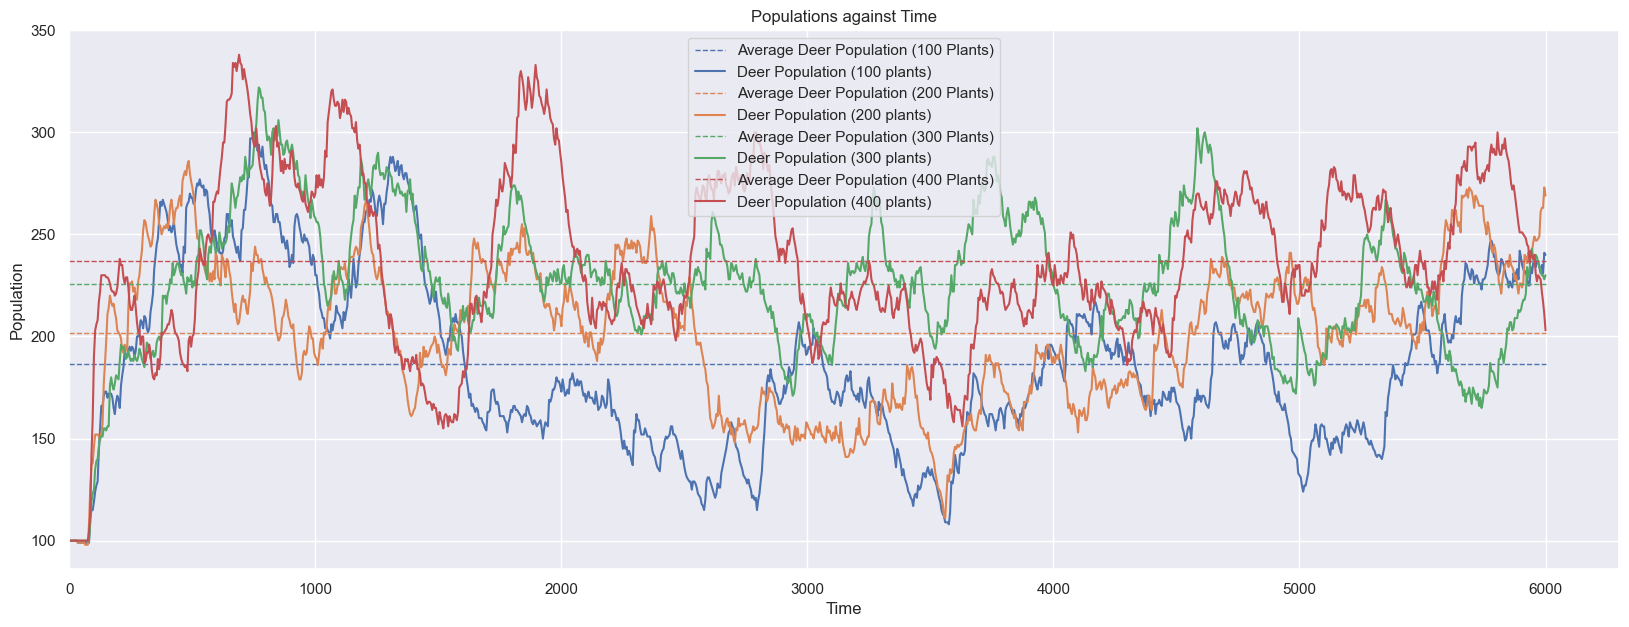

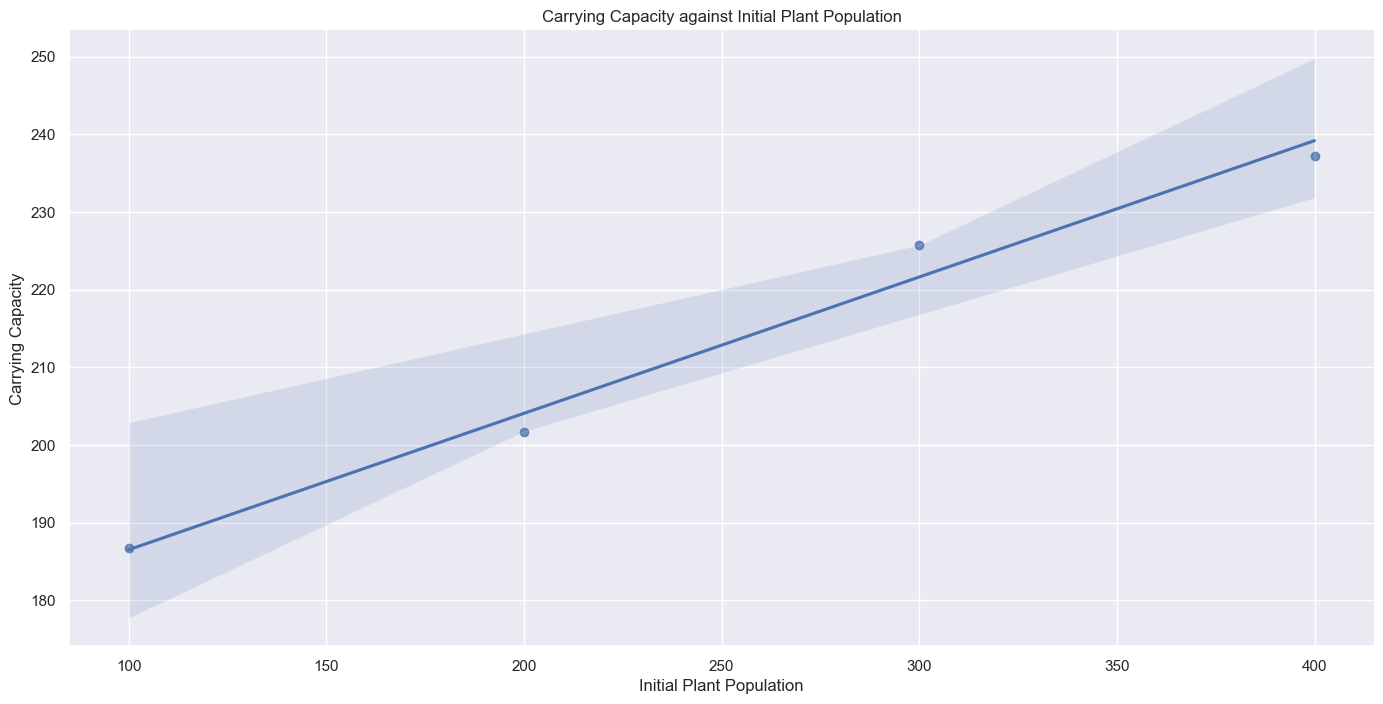

In [117]:
plt.figure(figsize=(20, 7))
plt.title("Populations against Time")

for i, df in enumerate([df_100, df_200, df_300, df_400]):
    data_count = max(df[df["species"] == "Deer"]["time"])
    plant_population = df.iloc[0]["plant_starting_population"]
    average_deer_population = np.average(df[df["species"] == "Deer"]["population"])

    print(f"Average deer population ({plant_population} plants): {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], linewidth=1, label=f"Average Deer Population ({plant_population} Plants)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="population", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Population ({plant_population} plants)")

g.set_xlabel("Time")
g.set_ylabel("Population")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_plant_population, x="plant_starting_population", y="average_deer_population", height=7, aspect=2)
plt.gca().set_title("Carrying Capacity against Initial Plant Population")
g.set(ylabel="Carrying Capacity", xlabel="Initial Plant Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_plant_population["plant_starting_population"], df_by_plant_population["average_deer_population"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer speed (100 plants): 1.1058929895833334
Average deer speed (200 plants): 1.4125815705
Average deer speed (300 plants): 1.1003965396666668
Average deer speed (400 plants): 0.9897982500833332

R = -0.4693731034239612
Std_err: 0.0008785775015055028


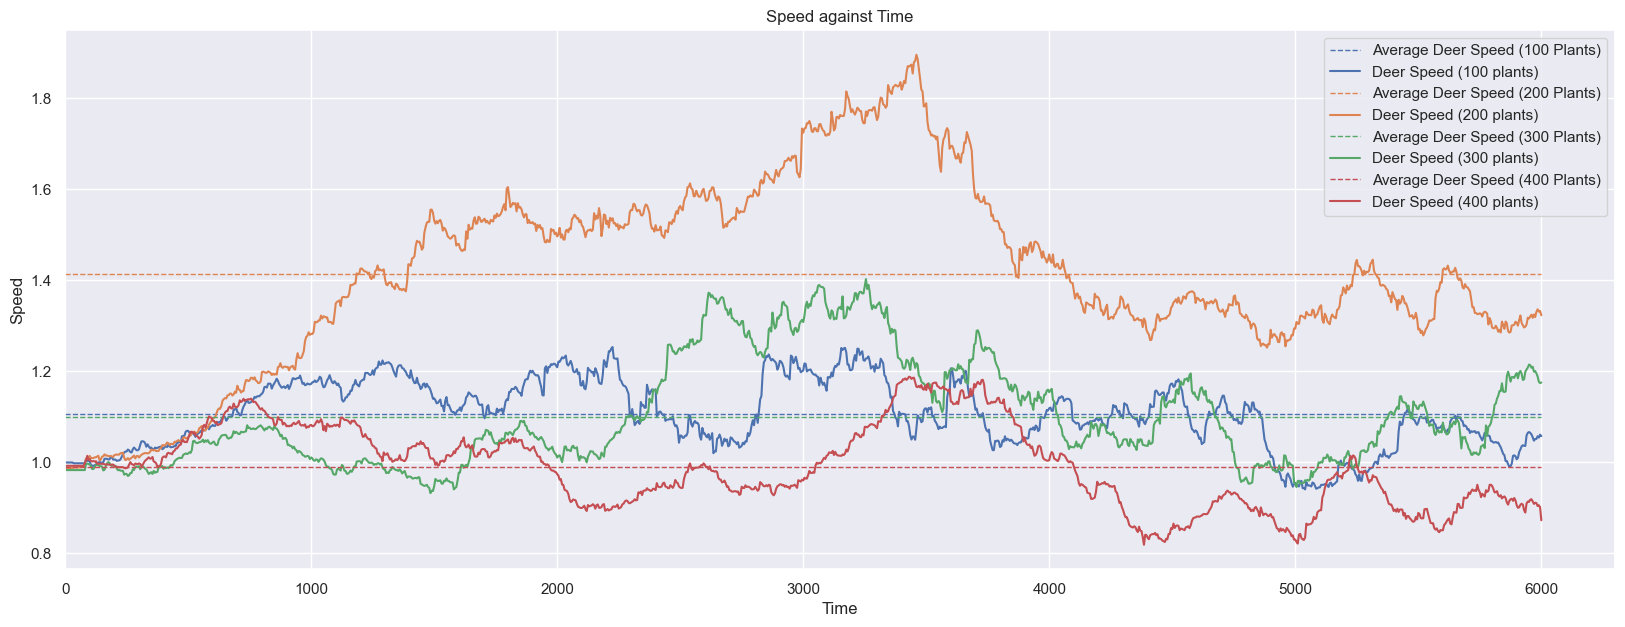

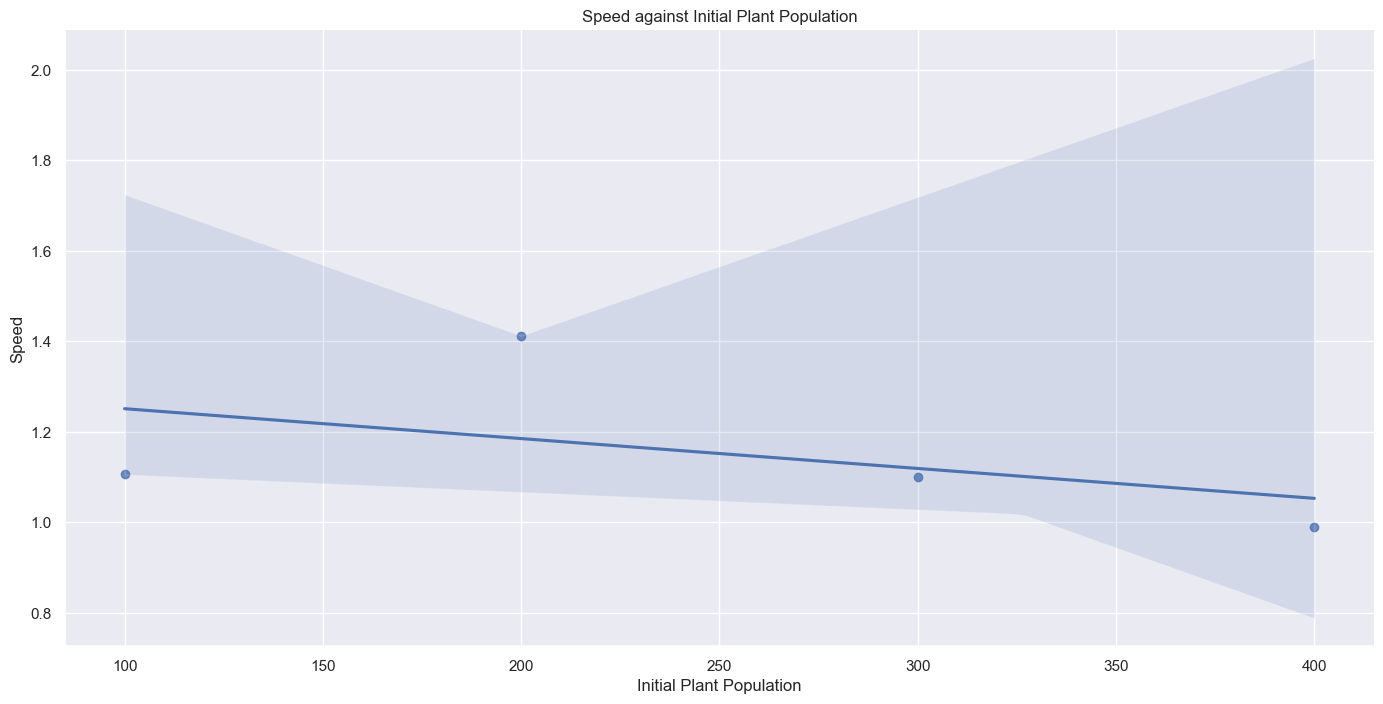

In [118]:
plt.figure(figsize=(20, 7))
plt.title("Speed against Time")

for i, df in enumerate([df_100, df_200, df_300, df_400]):
    data_count = max(df[df["species"] == "Deer"]["time"])
    plant_population = df.iloc[0]["plant_starting_population"]
    average_deer_speed = np.average(df[df["species"] == "Deer"]["speed"])

    print(f"Average deer speed ({plant_population} plants): {average_deer_speed}")

    plt.plot([0, data_count], [average_deer_speed, average_deer_speed], linewidth=1, label=f"Average Deer Speed ({plant_population} Plants)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="speed", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Speed ({plant_population} plants)")

g.set_xlabel("Time")
g.set_ylabel("Speed")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_plant_population, x="plant_starting_population", y="average_speed", height=7, aspect=2)
plt.gca().set_title("Speed against Initial Plant Population")
g.set(ylabel="Speed", xlabel="Initial Plant Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_plant_population["plant_starting_population"], df_by_plant_population["average_speed"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deer size (100 plants): 1.4768063108333334
Average deer size (200 plants): 1.4474148050833333
Average deer size (300 plants): 1.5115101691666666
Average deer size (400 plants): 1.5748987974999997

R = 0.8438861895413096
Std_err: 0.00016111052376458062


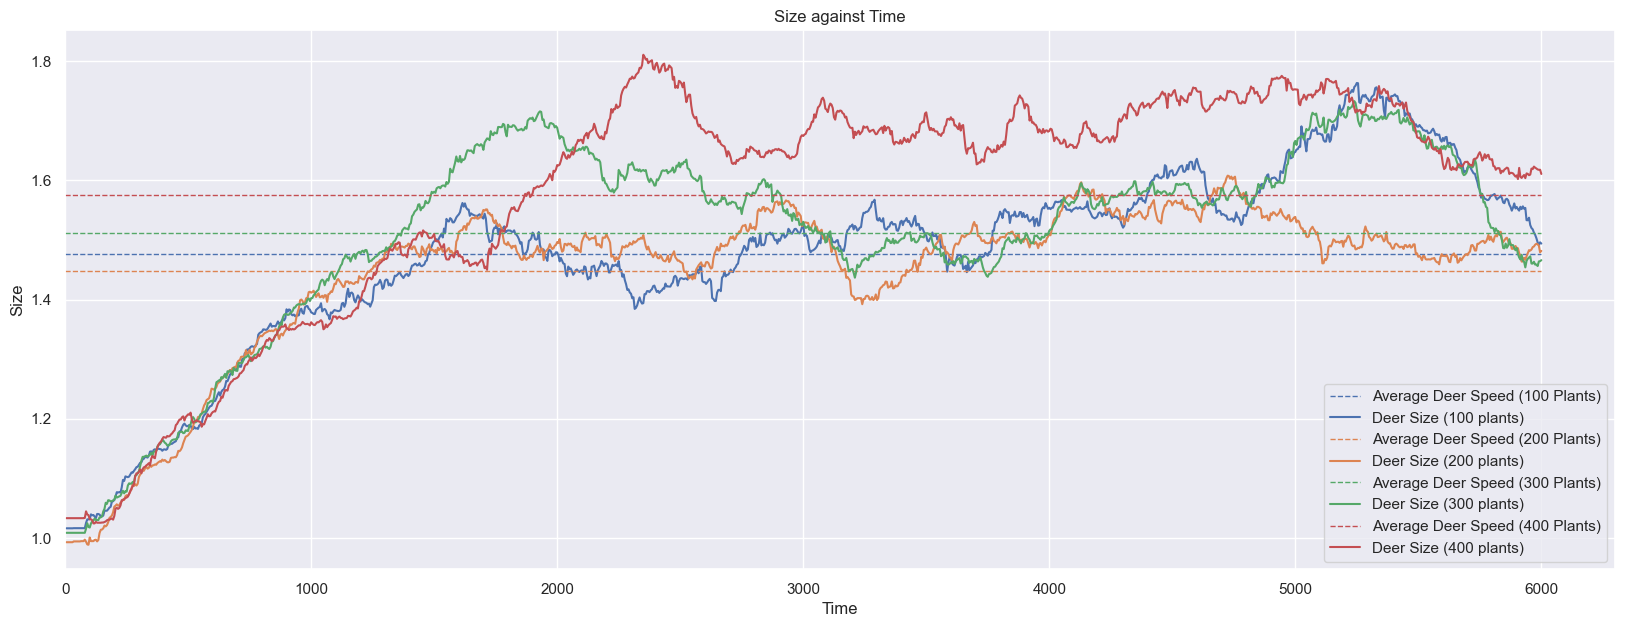

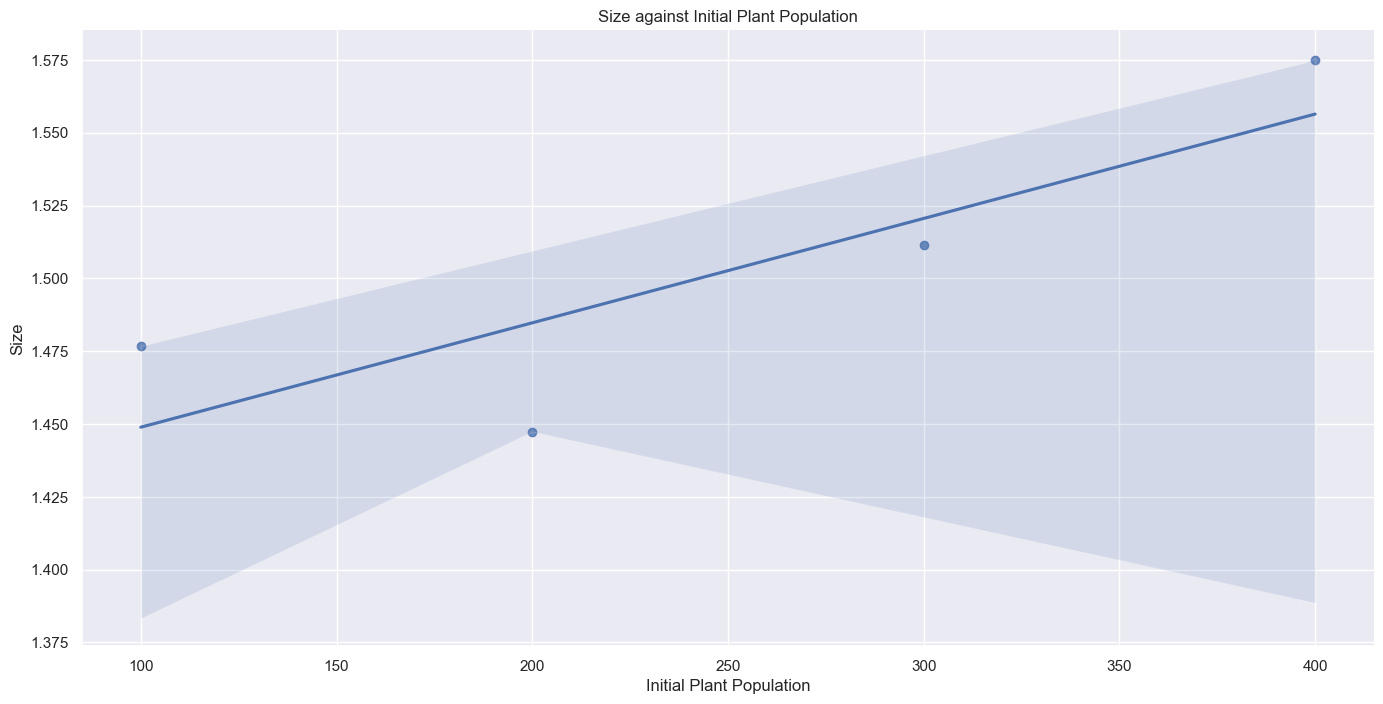

In [119]:
plt.figure(figsize=(20, 7))
plt.title("Size against Time")

for i, df in enumerate([df_100, df_200, df_300, df_400]):
    data_count = max(df[df["species"] == "Deer"]["time"])
    plant_population = df.iloc[0]["plant_starting_population"]
    average_deer_size = np.average(df[df["species"] == "Deer"]["size"])

    print(f"Average deer size ({plant_population} plants): {average_deer_size}")

    plt.plot([0, data_count], [average_deer_size, average_deer_size], linewidth=1, label=f"Average Deer Speed ({plant_population} Plants)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="size", color=sns.color_palette()[i], linewidth=1.5, label=f"Deer Size ({plant_population} plants)")

g.set_xlabel("Time")
g.set_ylabel("Size")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_plant_population, x="plant_starting_population", y="average_size", height=7, aspect=2)
plt.gca().set_title("Size against Initial Plant Population")
g.set(ylabel="Size", xlabel="Initial Plant Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_plant_population["plant_starting_population"], df_by_plant_population["average_size"])
print(f"R = {r_value}\nStd_err: {std_err}")

Average deaths by hunger (100 plants): 0.9991666666666666
Average deaths by hunger (200 plants): 1.4108333333333334
Average deaths by hunger (300 plants): 1.0258333333333334
Average deaths by hunger (400 plants): 0.9925

R = -0.2575483783485123
Std_err: 0.0010744287888093014


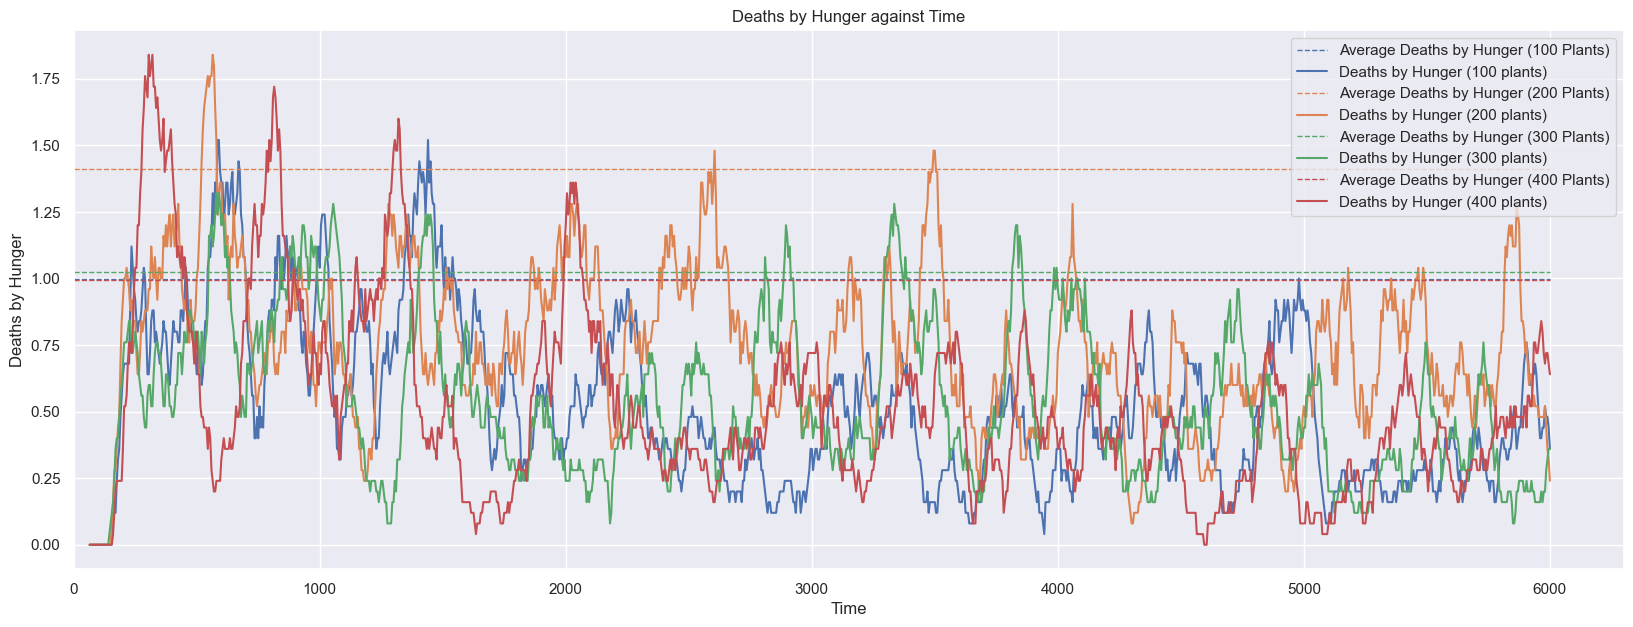

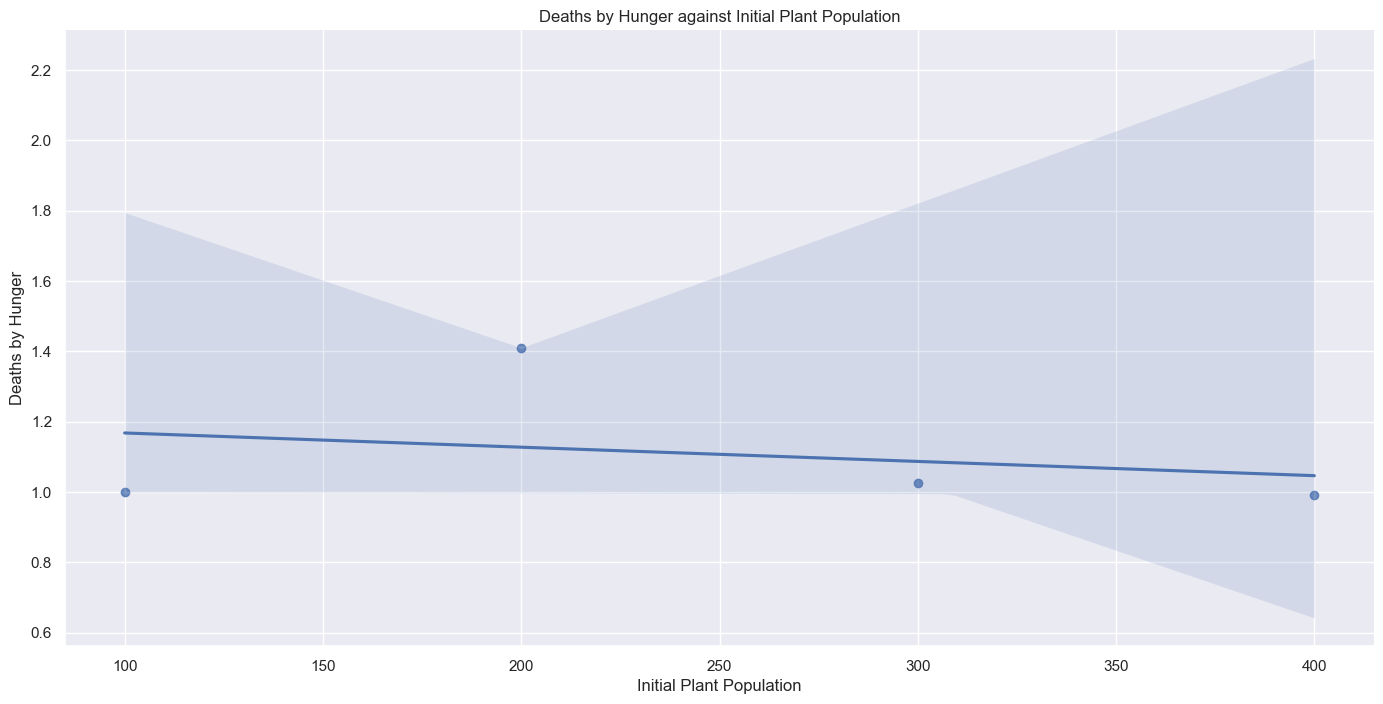

In [120]:
plt.figure(figsize=(20, 7))
plt.title("Deaths by Hunger against Time")

for i, df in enumerate([df_100, df_200, df_300, df_400]):
    data_count = max(df[df["species"] == "Deer"]["time"])
    plant_population = df.iloc[0]["plant_starting_population"]
    
    average_deaths_over_time = np.average(df[df["species"] == "Deer"]["deathsByHunger"])
    print(f"Average deaths by hunger ({plant_population} plants): {average_deaths_over_time}")
    plt.plot([0, data_count], [average_deaths_over_time, average_deaths_over_time], linewidth=1, label=f"Average Deaths by Hunger ({plant_population} Plants)", color=sns.color_palette()[i], linestyle="--")

    g = sns.lineplot(data=df[df["species"] == "Deer"], x="time", y="deathsByHungerSmoothed", color=sns.color_palette()[i], linewidth=1.5, label=f"Deaths by Hunger ({plant_population} plants)")

g.set_xlabel("Time")
g.set_ylabel("Deaths by Hunger")
g.axes.set_xlim(0)

print()
g = sns.lmplot(data=df_by_plant_population, x="plant_starting_population", y="average_deaths_by_hunger", height=7, aspect=2)
plt.gca().set_title("Deaths by Hunger against Initial Plant Population")
g.set(ylabel="Deaths by Hunger", xlabel="Initial Plant Population")

slope, intercept, r_value, p_value, std_err = stats.linregress(df_by_plant_population["plant_starting_population"], df_by_plant_population["average_deaths_by_hunger"])
print(f"R = {r_value}\nStd_err: {std_err}")